<a href="https://colab.research.google.com/github/StarNathaly/Analisis_estadistico_de_la_senal-Lab_1_senales/blob/main/Primer_LAB_se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.8 MB/s eta 0:00:00


In [2]:
!pip install scipy

In [3]:
!pip install numpy

SEÑAL CONTAMINADA CON RUIDO TIPO GAUSSIANO 


ESTADÍSTICOS DESCRIPTIVOS DE LA SEÑAL PCG 

la media programada es: -0.15944
la media de python es: -0.15944 

la desviacion programada es: 3.7132523327131977
la desviacion de python es: 3.713252332713197 

el coeficiente de variacion programado es: -2328.933976864775
el coeficiente de variacion de python es: -2328.933976864775 

La potencia de la señal es: 127.10556799999998 

La potencia del ruido gaussiano 1 es: 0.3984451807412011
La potencia del ruido gaussiano 2 es: 76.46583099064358 

El SNR de la señal contaminada con ruido Gaussiano 1 es: 25.037959973897287
El SNR de la señal contaminada con ruido Gaussiano 2 es: 2.2069716314559105 




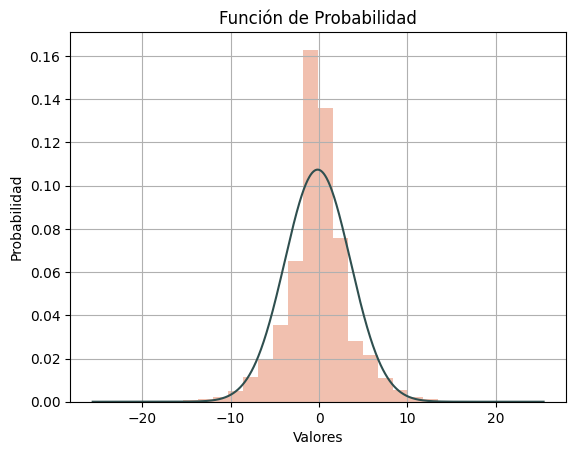

IMPORTANTE: Obtención de datos, aclaraciones para la gráfica y explicación del SNR
---------------------------------------------------------------------------------------------------------------------------------- 

La señal utilizada se encontro en la base de datos de physionet, un PCG es una fonocardiografía fetal
Se obtuvo de diferentes mujeres embarazadas durante los últimos meses de sus embarazos fisiológicos de feto único (semana 30-40)
Las mujeres estaban sanas y tenían de un rango entre 25 y 35 años 

Para aclarar el eje de las gráficas, los datos se digitalizaron con una frecuencia de muestreo de 333 Hz a 8 bits ADC
El eje x en la gráfica vuelve el muestro a tiempo, lo que sería 1/333 Hz, lo que daría que las muestras se toman cada 3 ms
El eje y en la gráfica sería la intensidad del sonido detectato en bits por el ADC, pero se deja únicamente como amplitud 

El SNR son las siglas para el significado relación señal-Ruido, define la relación entre la potencia de la señal que se 

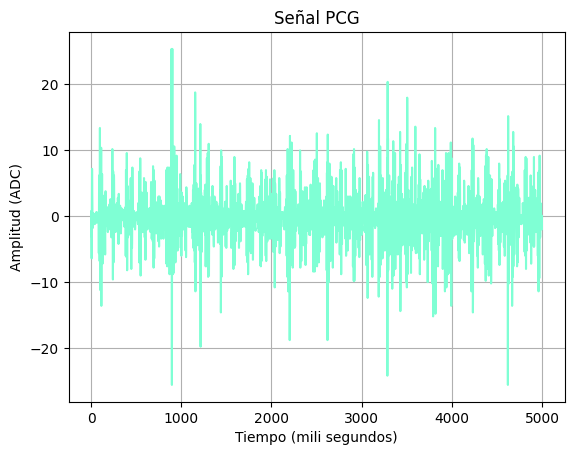

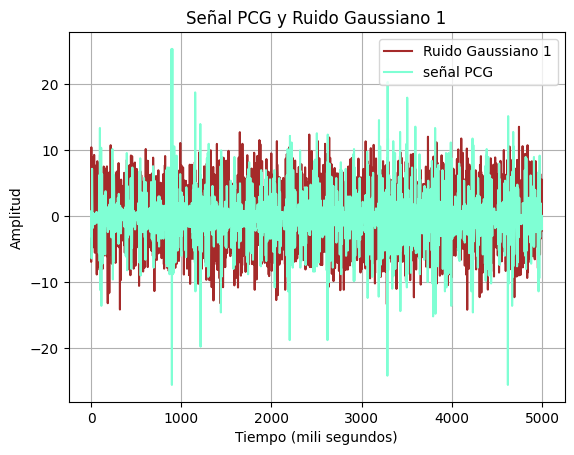

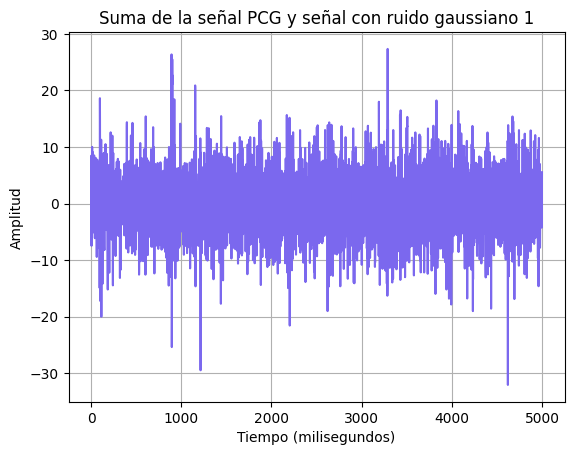

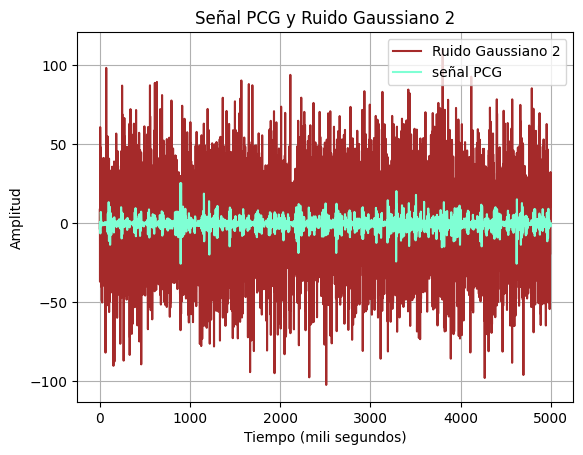

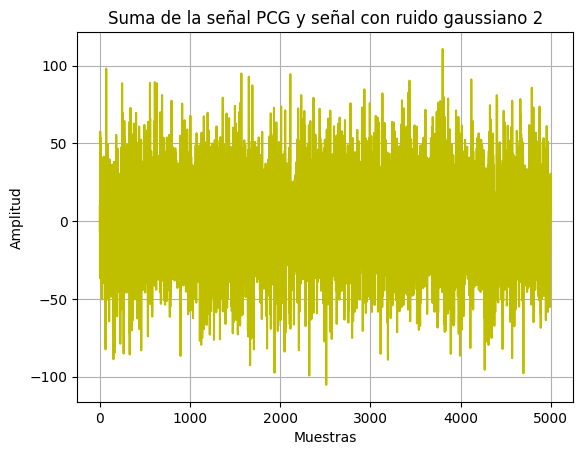

In [112]:
from ctypes import c_void_p
# importar paquete wfdb para leer records de physionet
from scipy.stats import variation, norm
from scipy import stats
# esta solo la uso para una funcion directa del coeficiente de variación y función de probabilidad

import wfdb
import matplotlib.pyplot as plt
import numpy as np

#cargar la informacion (hay que tener los archivos .dat y .hea)
#Simplemente colocas el nombre que comparten los dos archivos, quitando el "dat" y "hat" en esta parte
signal = wfdb.rdrecord('fetal_PCG_p01_GW_36')

#obtener valores de y en la señal
valores = signal.p_signal[:,0] #para acceder a los valores de la señal
# el [: ,0 ] es para tomar solamente la primera columna de la señal, ya que es una matriz con muchas y solo necesitamos tener una

muestra_valores = valores[ :5000]/1000
#Solo se estan tomando las primeras 5000 muestras en vez de las 400 000, y se divide entre 1000 para que la amplitud sea más pequeñita.
#Cambiando el 5000 puedes modificar la cantidad de muestras que te gustaría usar según necesites

tamanoG = signal.sig_len #numero de muestras de la gráfica pero sin reducir su escala
tamanoP = muestra_valores.size #Este es el tamaño de la gráfica a escala pequeña que usaremos

#RUIDO GAUSSIANO

N = 5000 #Numero de ejemplos a simular
RuidoG_positivo = np.random.randn(N)*4   #Ayuda a generar diferentes puntos aleatorios para nuestra gráfica.
RuidoG_negativo = np.random.randn(N)*30   #Hacemos un un ruido más grande que el otro para obtener diferentes valores de SNR

tamano_ruidopositivo = RuidoG_positivo.size    #Guarda tamaño y valores del ruido
valoresRpositivo = RuidoG_positivo

tamano_ruidonegativo = RuidoG_negativo.size
valoresRnegativo = RuidoG_negativo

Magenta = '\033[95m'
RESET = '\033[0m'

print(f"{Magenta}SEÑAL CONTAMINADA CON RUIDO TIPO GAUSSIANO \n\n")
print(f"ESTADÍSTICOS DESCRIPTIVOS DE LA SEÑAL PCG{RESET} \n")

#media de la señal
mediap = 1/tamanoP * np.sum(muestra_valores)
media = np.mean(muestra_valores)
print(f"la media programada es: {mediap}") #Imprimir el valor de la media
print(f"la media de python es: {media} \n")

#desviacion de la señal
desviacionp = np.sqrt(1/tamanoP * np.sum((muestra_valores - mediap)**2))
desviacion = np.std(muestra_valores)
print(f"la desviacion programada es: {desviacionp}") #Imprimir el valor de la desviacion estandar
print(f"la desviacion de python es: {desviacion} \n")

#Coeficiente de variación
cofp = (desviacion /media) * 100
print(f"el coeficiente de variacion programado es: {cofp}") #Imprimir el valor del coeficiente de variacion
cof = variation(muestra_valores) * 100
print(f"el coeficiente de variacion de python es: {cof} \n")

#Potencia y SNR

PotenciaSeñal = ((np.sum(muestra_valores)**2)/tamanoP)
print(f"La potencia de la señal es: {PotenciaSeñal} \n")

PotenciaRuidopositivo = ((np.sum(valoresRpositivo)**2)/tamano_ruidopositivo)
print(f"La potencia del ruido gaussiano 1 es: {PotenciaRuidopositivo}")

PotenciaRuidonegativo = ((np.sum(valoresRnegativo)**2)/tamano_ruidonegativo)
print(f"La potencia del ruido gaussiano 2 es: {PotenciaRuidonegativo} \n")

SNR_p = 10.0 * np.log10(PotenciaSeñal/PotenciaRuidopositivo)
print(f"El SNR de la señal contaminada con ruido Gaussiano 1 es: {SNR_p}")

SNR_n = 10.0 * np.log10(PotenciaSeñal/PotenciaRuidonegativo)
print(f"El SNR de la señal contaminada con ruido Gaussiano 2 es: {SNR_n} \n\n")

#Función de probabilidad

# Crear un rango de valores para la gráfica de la PDF
x = np.linspace(np.min(muestra_valores), np.max(muestra_valores), 1000)
pdf = stats.norm.pdf(x, loc=np.mean(muestra_valores), scale=np.std(muestra_valores))

# Graficar la función de probabilidad
plt.hist(muestra_valores, bins=30, density=True, alpha=0.6, color='darksalmon', label='Datos')
plt.plot(x, pdf, color= 'darkslategrey')
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de Probabilidad')
plt.grid(True)
plt.show()

Verde = '\033[92m'  #Solo pa poner color a las letras
Azul = '\033[94m'

print(f"{Verde}IMPORTANTE: Obtención de datos, aclaraciones para la gráfica y explicación del SNR{RESET}")
print(f"---------------------------------------------------------------------------------------------------------------------------------- \n")
print(f"{Azul}La señal utilizada se encontro en la base de datos de physionet, un PCG es una fonocardiografía fetal")
print(f"Se obtuvo de diferentes mujeres embarazadas durante los últimos meses de sus embarazos fisiológicos de feto único (semana 30-40)")
print(f"Las mujeres estaban sanas y tenían de un rango entre 25 y 35 años \n")
print(f"Para aclarar el eje de las gráficas, los datos se digitalizaron con una frecuencia de muestreo de 333 Hz a 8 bits ADC")
print(f"El eje x en la gráfica vuelve el muestro a tiempo, lo que sería 1/333 Hz, lo que daría que las muestras se toman cada 3 ms")
print(f"El eje y en la gráfica sería la intensidad del sonido detectato en bits por el ADC, pero se deja únicamente como amplitud \n")
print(f"El SNR son las siglas para el significado relación señal-Ruido, define la relación entre la potencia de la señal que se necesita y el ruido")
print(f"La señal es la que se transmite y se puede decir que el ruido es que el nos corrompe a información")
print(f"El SNR nos ayuda a tener una idea de la calidad de las señales, ya que nos puede dar una mejor imagen y sabremos qué es lo que medimos")
print(f"Como análisis general, un SNR más bajo o negativo con cualquiera de las señales de ruido, indica que este ruido tiene un impacto mayor en la señal, reduciendo su calidad.")
print(f"Mientras que un SNR más alto indica que la señal es relativamente clara y menos afectada por el ruido en ese caso \n")
print(f"Aquí está algunos archivos para PCG de donde tomé mi gráfica : https://physionet.org/content/fpcgdb/1.0.0/ {RESET} \n")
print(f"----------------------------------------------------------------------------------------------------------------------------------- \n")

# Graficar la señal PCG
plt.plot(muestra_valores, color = 'aquamarine')
plt.xlabel('Tiempo (mili segundos)')
plt.ylabel('Amplitud (ADC)')
plt.title('Señal PCG')
plt.grid(True)
plt.show()

# Señal PCG y ruido gaussiano 1 juntas

plt.plot(RuidoG_positivo, color ='brown', label = 'Ruido Gaussiano 1')
plt.plot(muestra_valores, color = 'aquamarine', label = 'señal PCG')
plt.xlabel('Tiempo (mili segundos)')
plt.ylabel('Amplitud')
plt.title('Señal PCG y Ruido Gaussiano 1')
plt.legend()
plt.grid(True)
plt.show()

#Suma del ruido gaussiano 1 y la señal PCG
Graf1_1 = RuidoG_positivo + muestra_valores
plt.plot(Graf1_1, color='mediumslateblue')
plt.xlabel('Tiempo (milisegundos)')
plt.ylabel('Amplitud')
plt.title('Suma de la señal PCG y señal con ruido gaussiano 1')
plt.grid(True)
plt.show()

# Señal PCG y ruido gaussiano 2 juntas

plt.plot(RuidoG_negativo, color ='brown', label = 'Ruido Gaussiano 2')
plt.plot(muestra_valores, color = 'aquamarine', label = 'señal PCG')
plt.xlabel('Tiempo (mili segundos)')
plt.ylabel('Amplitud')
plt.title('Señal PCG y Ruido Gaussiano 2')
plt.legend()
plt.grid(True)
plt.show()

#Suma del ruido gaussiano 2 y la señal original

Graf1_2 = RuidoG_negativo + muestra_valores
plt.plot(Graf1_2, color='#BFBF00')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Suma de la señal PCG y señal con ruido gaussiano 2')
plt.grid(True)
plt.show()







SEÑAL CONTAMINADA CON RUIDO TIPO ARTEFACTO 


La potencia de la señal es: 127.10556799999998 

La potencia del ruido Artefacto 1 es: 4.1359030627651386e-29
La potencia del ruido Artefacto 2 es: 163.62309131088736 

El SNR de la señal contaminada con ruido Artefacto 1 es: 304.87594224503357
El SNR de la señal contaminada con ruido Artefacto 2 es: 285.6712847824633 


Aquí al ser una señal de ruido tipo artefacto, la señal logra leerse mejor
Esto se debe a que hay lapsos donde la señal no es interrumpida por el ruido y sólo sucede en ciertas áreas
Por eso en este caso, se puede ver que disminuye el SNR si le proporcionemos un periodo e inactividad que cubran lo suficiente la señal


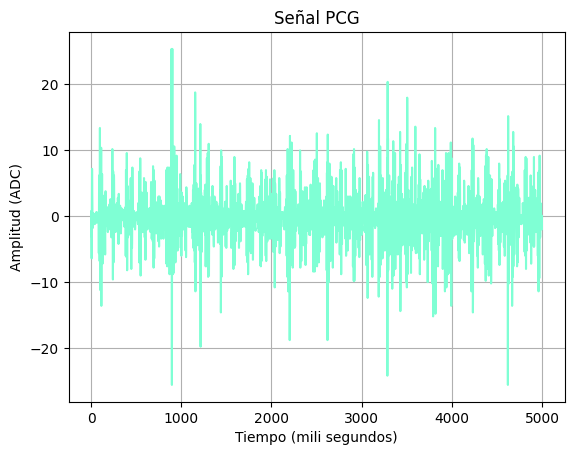

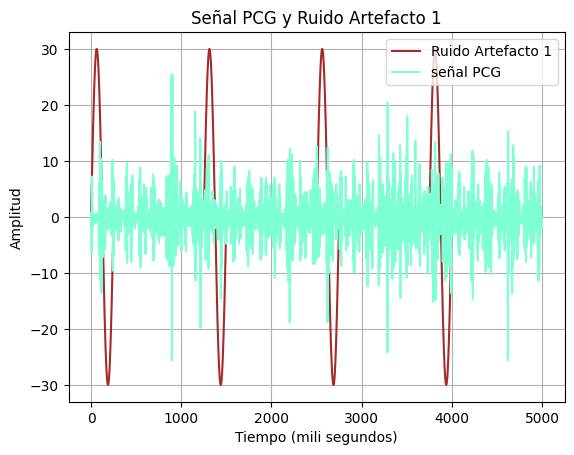

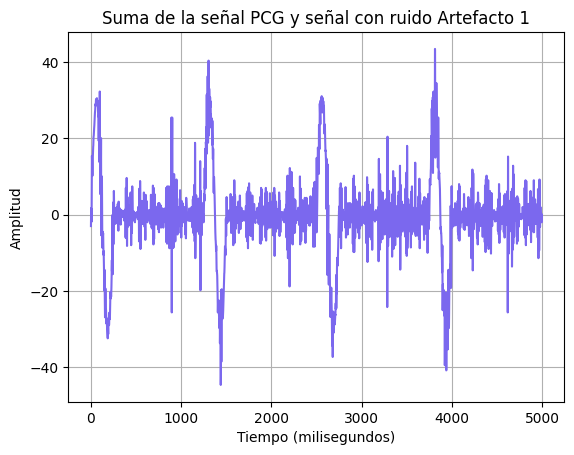

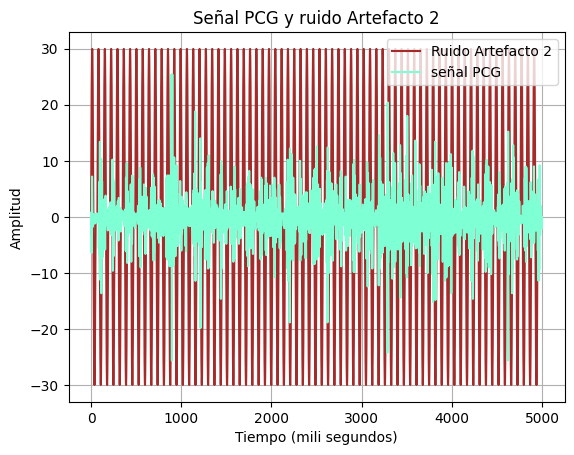

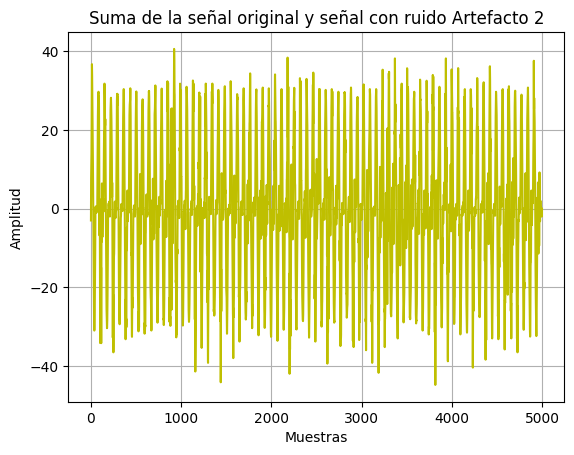

In [110]:
# RUIDO ARTEFACTO

# El número de muestras lo puedes ajustar según la cantidad que hayas tomado de la original
amplitud = 30
num_muestras = 5000
periodo_senoA1 = 250
periodo_senoA2 = 50 # Duración del periodo activo de la señal seno
inactividad1 = 1000  # Duración del periodo de inactividad (línea recta en cero)
inactividad2 = 20
# Crear el vector de tiempo
t = np.arange(num_muestras)

# Crear la señal
señalArte1 = np.zeros(num_muestras)
for i in range(0, num_muestras, periodo_senoA1 + inactividad1):
    end = i + periodo_senoA1
    if end <= num_muestras:
        señalArte1[i:end] = amplitud * np.sin(2 * np.pi * np.arange(0, periodo_senoA1) / periodo_senoA1)

señalArte2 = np.zeros(num_muestras)
for i in range(0, num_muestras, periodo_senoA2 + inactividad2):
    end = i + periodo_senoA2
    if end <= num_muestras:
        señalArte2[i:end] = amplitud * np.sin(2 * np.pi * np.arange(0, periodo_senoA2) / periodo_senoA2)

#Se hicieron dos señales para apreciar el SNR aumentando la frecuencia de la señal, ambas comparten la cantidad de muestras así que no afectara los cálculos.

print(f"{Magenta}SEÑAL CONTAMINADA CON RUIDO TIPO ARTEFACTO{RESET} \n\n")

tamano_arte = num_muestras
valoresApositivo = señalArte1
valoresAnegativo = señalArte2

#Potencia y SNR

PotenciaSeñal = ((np.sum(muestra_valores)**2)/tamanoP)
print(f"La potencia de la señal es: {PotenciaSeñal} \n")

PotenciaArtepositivo = ((np.sum(valoresApositivo)**2)/tamano_arte)
print(f"La potencia del ruido Artefacto 1 es: {PotenciaArtepositivo}")

PotenciaArtenegativo = ((np.sum(valoresAnegativo)**2)/tamano_arte)
print(f"La potencia del ruido Artefacto 2 es: {PotenciaRuidonegativo} \n")

SNR_pA = 10.0 * np.log10(PotenciaSeñal/PotenciaArtepositivo)
print(f"El SNR de la señal contaminada con ruido Artefacto 1 es: {SNR_pA}")

SNR_nA = 10.0 * np.log10(PotenciaSeñal/PotenciaArtenegativo)
print(f"El SNR de la señal contaminada con ruido Artefacto 2 es: {SNR_nA} \n\n")

print(f"{Azul}Aquí al ser una señal de ruido tipo artefacto, la señal logra leerse mejor")
print(f"Esto se debe a que hay lapsos donde la señal no es interrumpida por el ruido y sólo sucede en ciertas áreas")
print(f"Por eso en este caso, se puede ver que disminuye el SNR si le proporcionemos un periodo e inactividad que cubran lo suficiente la señal{RESET}")

# Graficar la señal PCG
plt.plot(muestra_valores, color = 'aquamarine')
plt.xlabel('Tiempo (mili segundos)')
plt.ylabel('Amplitud (ADC)')
plt.title('Señal PCG')
plt.grid(True)
plt.show()

# Señal PCG y ruido artefacto 1 juntas

plt.plot(valoresApositivo, color ='brown', label = 'Ruido Artefacto 1')
plt.plot(muestra_valores, color = 'aquamarine', label = 'señal PCG')
plt.xlabel('Tiempo (mili segundos)')
plt.ylabel('Amplitud')
plt.title('Señal PCG y Ruido Artefacto 1')
plt.legend()
plt.grid(True)
plt.show()

#Suma del ruido artefacto 1 y la señal PCG
Graf2_1 = valoresApositivo + muestra_valores
plt.plot(Graf2_1, color='mediumslateblue')
plt.xlabel('Tiempo (milisegundos)')
plt.ylabel('Amplitud')
plt.title('Suma de la señal PCG y señal con ruido Artefacto 1')
plt.grid(True)
plt.show()

# Señal PCG y ruido artefacto 2 juntas

plt.plot(valoresAnegativo, color ='brown', label = 'Ruido Artefacto 2')
plt.plot(muestra_valores, color = 'aquamarine', label = 'señal PCG')
plt.xlabel('Tiempo (mili segundos)')
plt.ylabel('Amplitud')
plt.title('Señal PCG y ruido Artefacto 2')
plt.legend()
plt.grid(True)
plt.show()

#Suma del ruido gaussiano 2 y la señal original

Graf2_2 = valoresAnegativo + muestra_valores
plt.plot(Graf2_2, color='#BFBF00')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Suma de la señal PCG y señal con ruido Artefacto 2')
plt.grid(True)
plt.show()



SEÑAL CONTAMINADA CON RUIDO TIPO IMPULSO 


La potencia de la señal es: 127.10556799999998 

La potencia del ruido Impulso 1 es: 2.88
La potencia del ruido Impulso 2 es: 184.32 

El SNR de la señal contaminada con ruido Artefacto 1 es: 16.447720879616504
El SNR de la señal contaminada con ruido Artefacto 2 es: -1.6140788602223695 


Los impulsos parece que abarcan más información a la señal y sus repeticiones deforman mucho la información


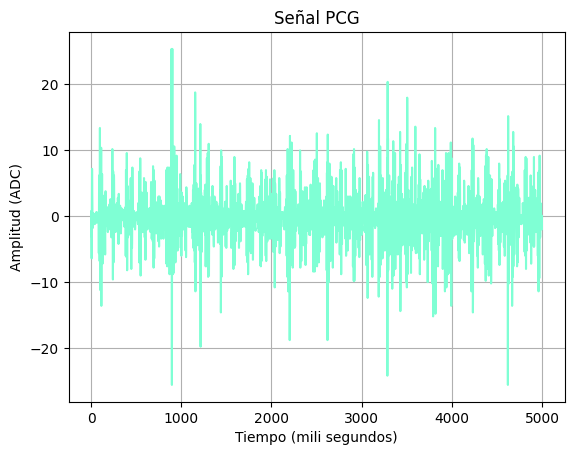

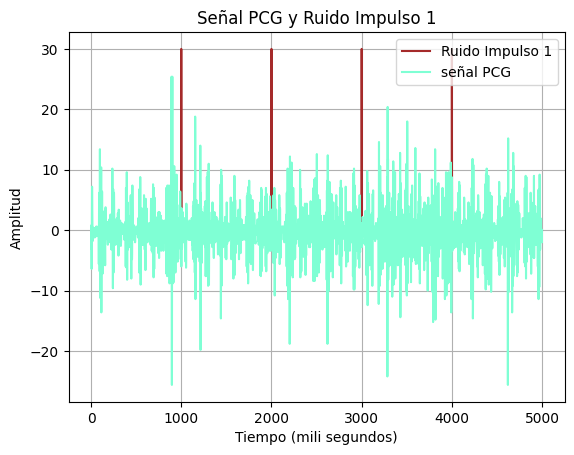

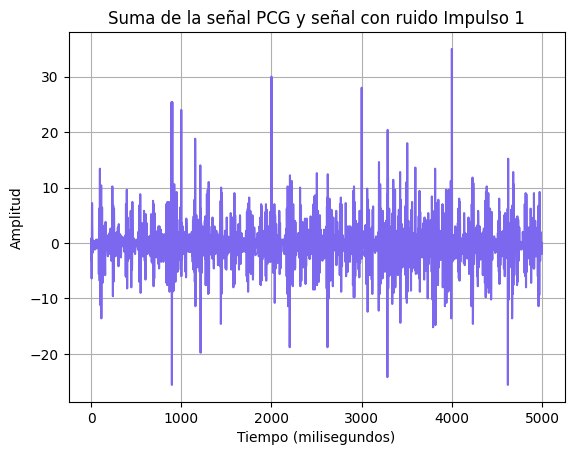

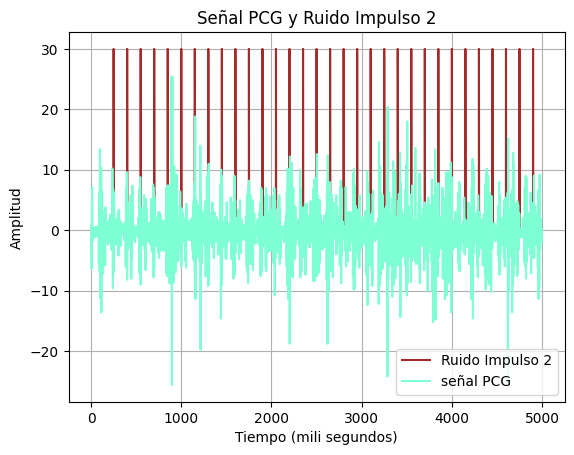

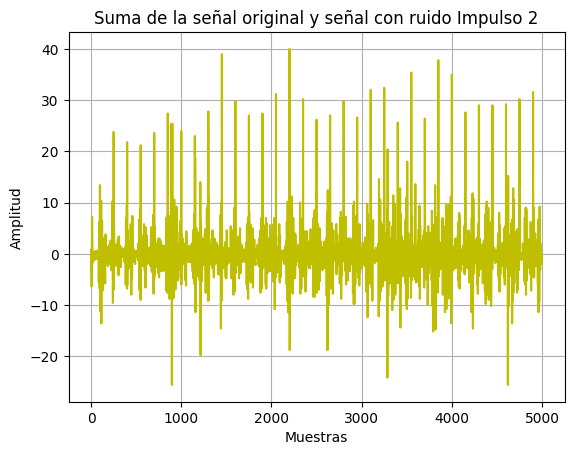

In [111]:

# SEÑAL TIPO IMPULSO

# Parámetros de la señal
Im_muestras = 5000  # Número total de muestras
posiciones_impulso1 = [1000, 2000, 3000, 4000]  # Posiciones de los impulsos en la señal
posiciones_impulso2 = list(range(250, 5000, 150)) #La primera es donde empieza, la segunda donde termina y la tercera cada tanto se hacen
amplitud = 30  # Amplitud de los impulsos

# Crear la señal de impulso
señalimpulso1 = np.zeros(Im_muestras)
for posicion in posiciones_impulso1:
    señalimpulso1[posicion] = amplitud

    señalimpulso2 = np.zeros(Im_muestras)
for posicion in posiciones_impulso2:
    señalimpulso2[posicion] = amplitud



print(f"{Magenta}SEÑAL CONTAMINADA CON RUIDO TIPO IMPULSO{RESET} \n\n")

tamano_impulso = Im_muestras
valoresIpositivo = señalimpulso1
valoresInegativo = señalimpulso2

#Potencia y SNR

PotenciaSeñal = ((np.sum(muestra_valores)**2)/tamanoP)
print(f"La potencia de la señal es: {PotenciaSeñal} \n")

Potenciaimpulsopositivo = ((np.sum(valoresIpositivo)**2)/tamano_impulso)
print(f"La potencia del ruido Impulso 1 es: {Potenciaimpulsopositivo}")

Potenciaimpulsonegativo = ((np.sum(valoresInegativo)**2)/tamano_impulso)
print(f"La potencia del ruido Impulso 2 es: {Potenciaimpulsonegativo} \n")

SNR_pI = 10.0 * np.log10(PotenciaSeñal/Potenciaimpulsopositivo)
print(f"El SNR de la señal contaminada con ruido Artefacto 1 es: {SNR_pI}")

SNR_nI = 10.0 * np.log10(PotenciaSeñal/Potenciaimpulsonegativo)
print(f"El SNR de la señal contaminada con ruido Artefacto 2 es: {SNR_nI} \n\n")

print(f"{Azul}Los impulsos parece que abarcan más información a la señal y sus repeticiones deforman mucho la información{RESET}")

# Graficar la señal PCG
plt.plot(muestra_valores, color = 'aquamarine')
plt.xlabel('Tiempo (mili segundos)')
plt.ylabel('Amplitud (ADC)')
plt.title('Señal PCG')
plt.grid(True)
plt.show()

# Señal PCG y ruido impulso 1 juntas

plt.plot(valoresIpositivo, color ='brown', label = 'Ruido Impulso 1')
plt.plot(muestra_valores, color = 'aquamarine', label = 'señal PCG')
plt.xlabel('Tiempo (mili segundos)')
plt.ylabel('Amplitud')
plt.title('Señal PCG y Ruido Impulso 1')
plt.legend()
plt.grid(True)
plt.show()

#Suma del ruido impulso 1 y la señal PCG
Graf3_1 = valoresIpositivo + muestra_valores
plt.plot(Graf3_1, color='mediumslateblue')
plt.xlabel('Tiempo (milisegundos)')
plt.ylabel('Amplitud')
plt.title('Suma de la señal PCG y señal con ruido Impulso 1')
plt.grid(True)
plt.show()

# Señal PCG y ruido impulso 2 juntas

plt.plot(valoresInegativo, color ='brown', label = 'Ruido Impulso 2')
plt.plot(muestra_valores, color = 'aquamarine', label = 'señal PCG')
plt.xlabel('Tiempo (mili segundos)')
plt.ylabel('Amplitud')
plt.title('Señal PCG y Ruido Impulso 2')
plt.legend()
plt.grid(True)
plt.show()

#Suma del ruido impulso 2 y la señal original

Graf3_2 = valoresInegativo + muestra_valores
plt.plot(Graf3_2, color='#BFBF00')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Suma de la señal PCG y señal con ruido Impulso 2')
plt.grid(True)
plt.show()
